In [2]:
import pandas as pd

PATH_DATA = '../data/Mall_Customer_noCustomerID.csv'
df = pd.read_csv(PATH_DATA)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

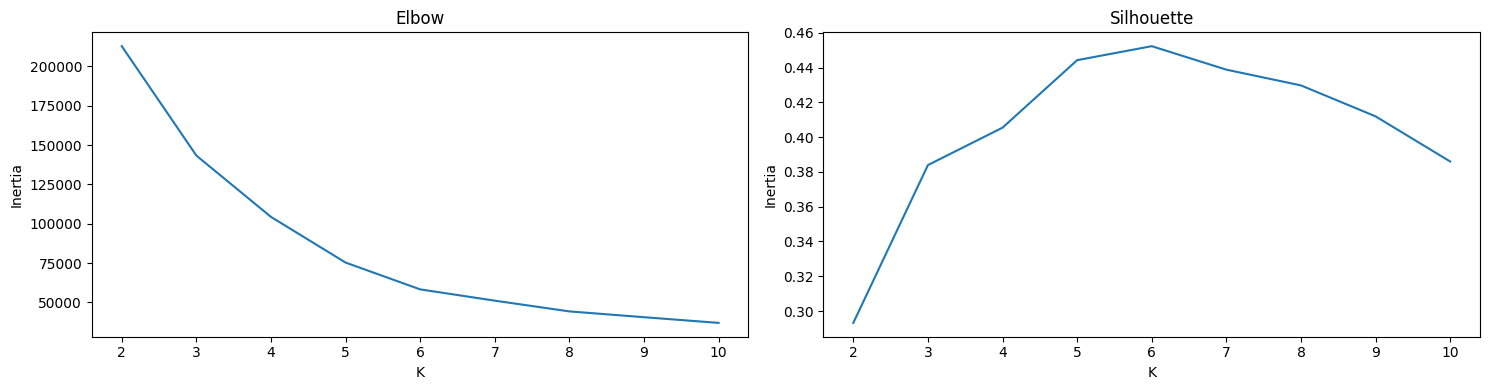

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), tight_layout=True)

elbow = {}
silhouette = []

n_clusters = range(2, 11)
X = df.drop("Gender", axis=1)
RANDOM_STATE=14

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    elbow[n] = kmeans.inertia_
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels))

sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel("K")
axs[0].set_ylabel("Inertia")
axs[0].set_title("Elbow")
sns.lineplot(x=n_clusters, y=silhouette, ax=axs[1])
axs[1].set_xlabel("K")
axs[1].set_ylabel("Inertia")
axs[1].set_title("Silhouette")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 0 5 4 2 4 5 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 3 2 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]
[[56.34090909 53.70454545 49.38636364]
 [41.64705882 88.73529412 16.76470588]
 [27.41025641 57.02564103 48.76923077]
 [32.69230769 86.53846154 82.12820513]
 [44.31818182 25.77272727 20.27272727]
 [25.27272727 25.72727273 79.36363636]]


In [8]:
df['cluster'] = kmeans.labels_

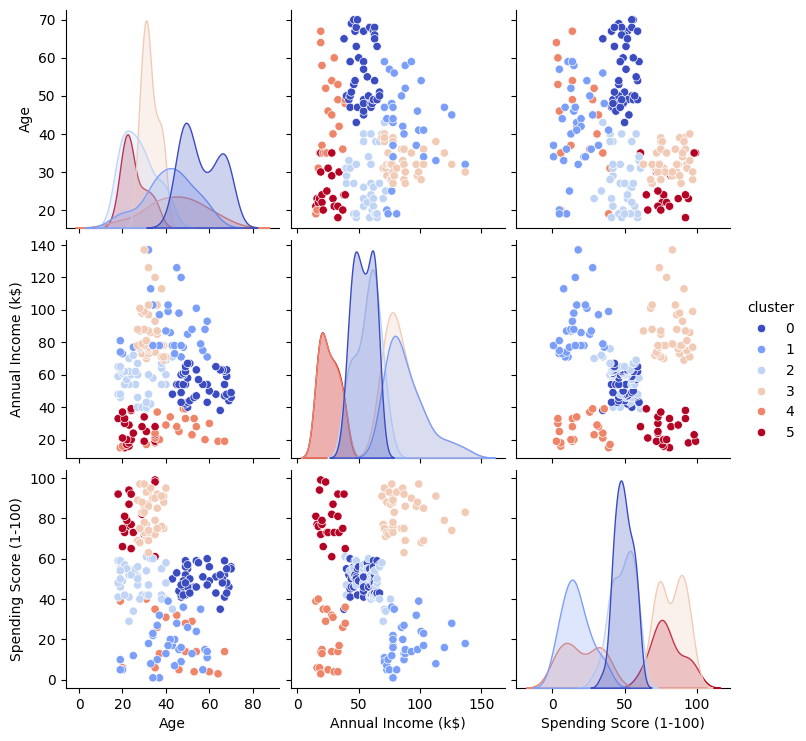

In [12]:
sns.pairplot(df, diag_kind="kde", hue="cluster", palette="coolwarm")

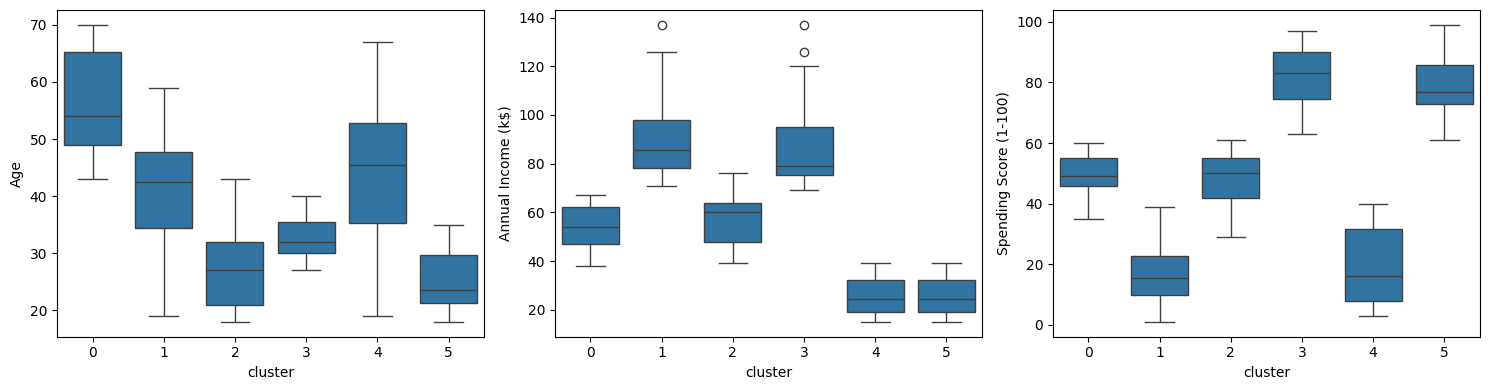

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), tight_layout=True)
for ax, col in zip(axs, df.select_dtypes("number")):
    sns.boxplot(data=df, x="cluster", y=col, ax=ax)

plt.show()

In [17]:
import numpy as np
np.sqrt(df.shape[0] / 2)

np.float64(10.0)

In [15]:
df["cluster"].value_counts().sort_index()

cluster
0    44
1    34
2    39
3    39
4    22
5    22
Name: count, dtype: int64

In [21]:
import joblib

joblib.dump(kmeans, "../models/kmeans.pkl")

['../models/kmeans.pkl']

In [19]:
df.to_csv('../data/Mail_Customer_Cluster.csv', index=False)